In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pty
%matplotlib inline

In [2]:
# Importing dataset
dataset = pd.read_csv("Algeria_forest_fire_updated.csv", index_col=0)
dataset.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
154,1.0,7.0,2012.0,28.0,58.0,18.0,2.2,63.7,3.2,8.5,1.2,3.3,0.5,0
32,3.0,7.0,2012.0,32.0,76.0,20.0,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0
115,24.0,9.0,2012.0,29.0,65.0,19.0,0.6,68.3,5.5,15.2,1.5,5.8,0.7,0
21,22.0,6.0,2012.0,31.0,67.0,17.0,0.1,79.1,7.0,39.5,2.4,9.7,2.3,0
198,14.0,8.0,2012.0,37.0,40.0,13.0,0.0,91.9,22.3,55.5,10.8,22.3,15.7,1


In [3]:
# No. of Null Values
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

- No Null Values

In [4]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [5]:
# Checking Correlation between data
df = dataset.drop(['day', 'year'], axis=1)

<AxesSubplot:>

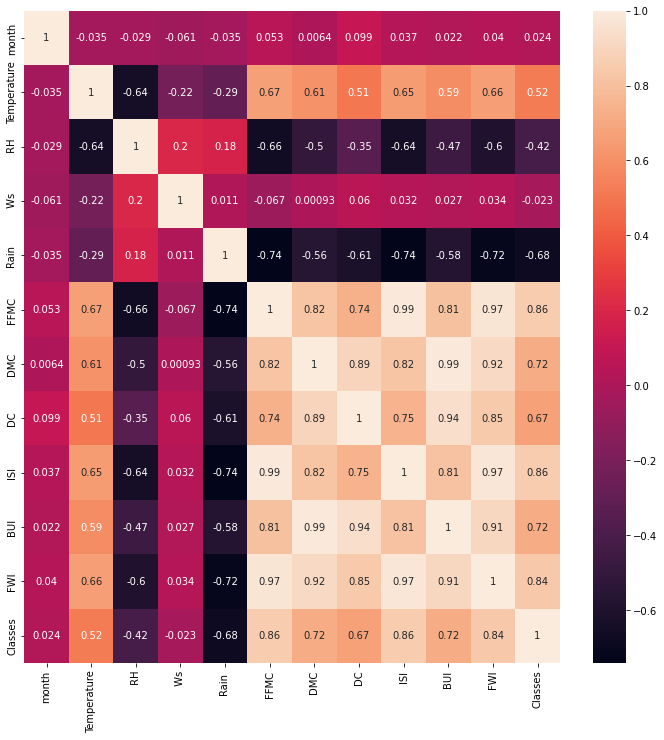

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'), annot=True)

In [19]:
# Correlation and Name of dataframe
name = df.corr(method='spearman').index
values = df.corr(method='spearman')["Temperature"].values
print(name, values)

Index(['month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object') [-0.03529736  1.         -0.64315722 -0.22351949 -0.29317299  0.66555265
  0.61139398  0.50544134  0.64836998  0.58569403  0.65711675  0.52148805]


In [20]:
# name having less correlation with temperature
drop_name = []
for i, values in enumerate(values):
    if values < 0.35 and values > -0.35 :
        drop_name.append(name[i])
drop_name

['month', ' Ws', 'Rain ']

In [21]:
# after Dropping values
df.drop(drop_name, axis=1, inplace=True)

In [22]:
df.describe()

,Temperature,RH,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,3.628039,14.828160,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,22.000000,21.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,35.000000,73.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


Text(0.5, 1.0, 'With Outliers')

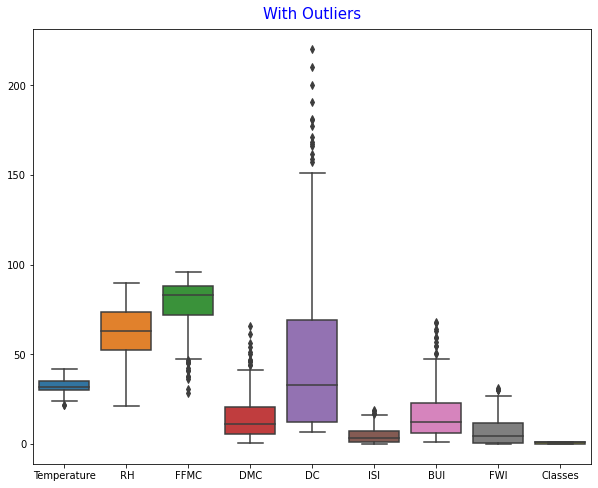

In [29]:
# Ploting BoxPLot for Checking Outliers:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title("With Outliers",fontdict={"fontsize" : 15, "color" : "blue"}, pad = 10)

In [31]:
# For Outliers Removers

df_new = df.copy()
for feature in df.columns:
    # First Quantile(Q1)
    Q1 = np.percentile(df[feature].values, 25, interpolation = 'midpoint')
  
    # Third quartile (Q3)
    Q3 = np.percentile(df[feature].values, 75, interpolation = 'midpoint')

    # Interquaritle range (IQR)
    IQR = Q3 - Q1
    
    # Lower and Upper Fence:
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    
    # Applying Outlier Remover
    df_new[feature] = np.where(df[feature] > upper_fence, upper_fence,
                np.where(df[feature] < lower_fence, lower_fence, df[feature]))
df_new.shape, df.shape

((243, 9), (243, 9))

Text(0.5, 1.0, 'After Removing Outliers')

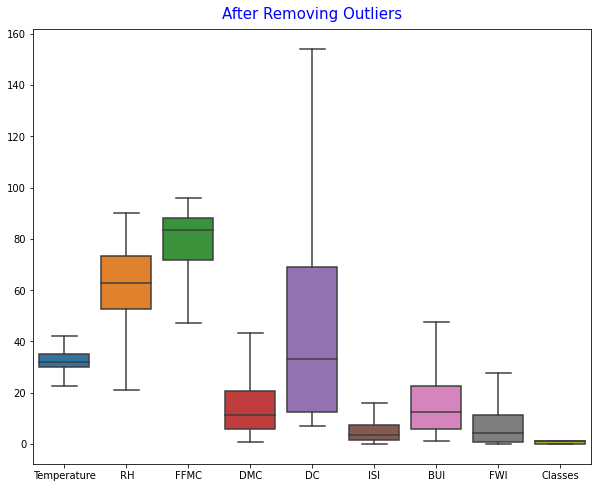

In [32]:
#After Outler Removeing
plt.figure(figsize=(10,8))
sns.boxplot(data=df_new)
plt.title("After Removing Outliers",fontdict={"fontsize" : 15, "color" : "blue"}, pad = 10)

- Outlier Replaced with High and Lower Fence value

In [33]:
# Checking Unique values
for feature in df_new.columns:
    print("-*-"*30)
    uniq_value = df_new[feature].unique()
    print(len(uniq_value))
    print(feature, " : ", uniq_value)

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
19
Temperature  :  [29.  26.  25.  27.  31.  33.  30.  28.  32.  34.  35.  36.  37.  22.5
 24.  38.  39.  40.  42. ]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
62
 RH  :  [57. 61. 82. 89. 77. 67. 54. 73. 88. 79. 65. 81. 84. 78. 80. 55. 62. 66.
 64. 53. 47. 50. 68. 75. 76. 63. 69. 70. 59. 48. 45. 60. 51. 52. 58. 86.
 74. 71. 49. 44. 41. 42. 90. 87. 72. 46. 37. 36. 56. 43. 83. 29. 34. 33.
 35. 39. 31. 21. 40. 24. 38. 26.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
161
FFMC  :  [65.7   64.4   47.175 64.8   82.6   88.2   86.6   52.9   73.2   84.5
 84.    50.    59.    49.4   56.9   79.9   59.8   81.    79.1   81.4
 85.9   86.7   86.8   89.    89.1   88.7   59.9   55.7   63.1   80.1
 87.    80.    85.6   66.6   81.1   75.1   81.8   73.9   60.7   72.6
 82.8   85.4   88.1   73.4   68.2   70.    84.3   89.2   

<AxesSubplot:>

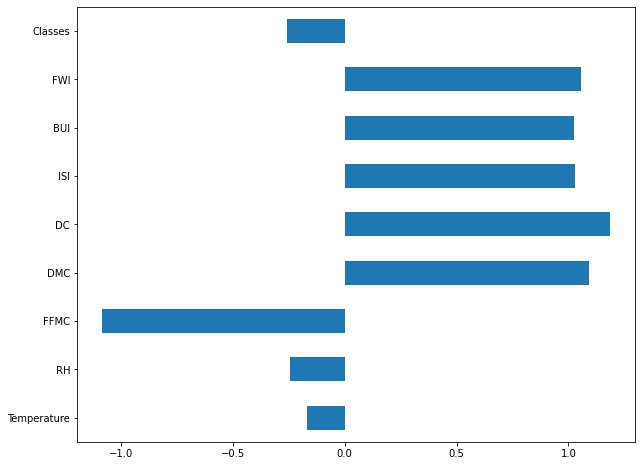

In [34]:
# Checking Skewness in dataset
df_new.skew().plot(kind="barh", figsize=(10,8))

In [35]:
rSkewFeature = []
lSkewFeature = []
for feature in df_new.columns:
    val = df_new[feature].skew()
    if val>0.85:
        rSkewFeature.append(feature)
    if val<-0.85:
        lSkewFeature.append(feature)
print("Right Skew :", rSkewFeature)
print("Left Skew :", lSkewFeature)

Right Skew : ['DMC', 'DC', 'ISI', 'BUI', 'FWI']
Left Skew : ['FFMC']


In [46]:
# Appling Log and np.srt for normalizing data
df_new2 = df_new.copy()
# for Right skew data
for feature in rSkewFeature:
    df_new2[feature] = np.log1p(df_new2[feature])

#For Left skew data
for feature in lSkewFeature:
    df_new2[feature] = (df_new2[feature])**3/2

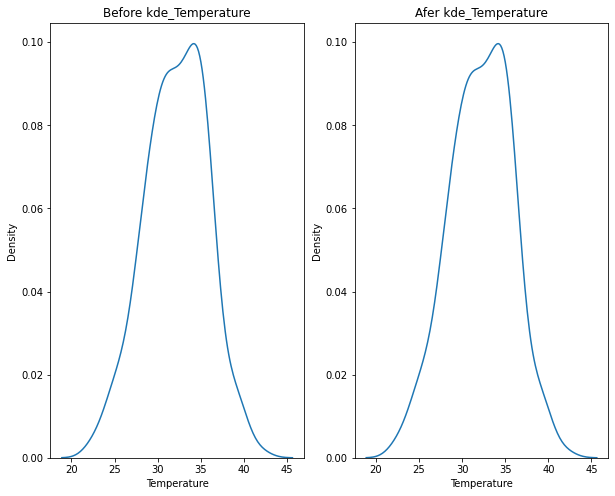

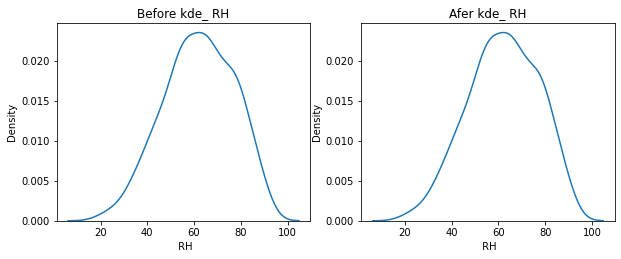

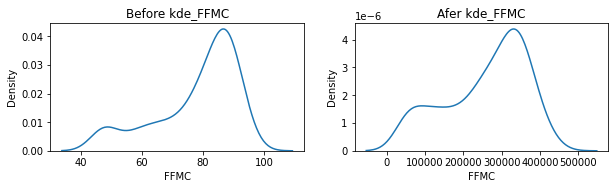

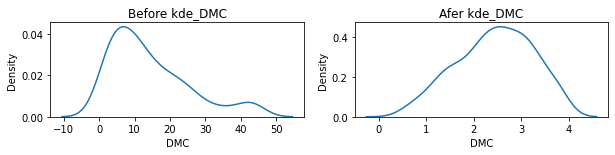

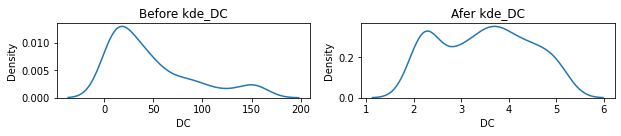

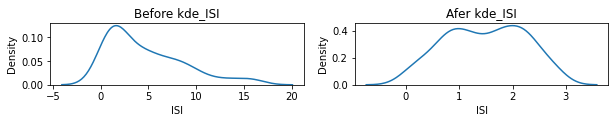

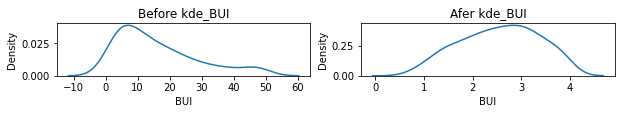

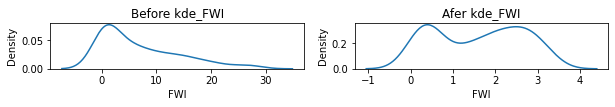

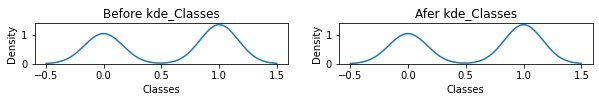

In [47]:
# Before and After Adjusting Skew
for i,feature in enumerate(df_new.columns):
    plt.figure(figsize=(10,8))
    plt.subplot(i+1,2,1)
    sns.kdeplot(df_new[feature])
    plt.title("Before kde_"+str(feature))
    
    plt.subplot(i+1,2,2)
    sns.kdeplot(df_new2[feature])
    plt.title("Afer kde_"+str(feature))
    plt.show()

- Minute Adjustment in Skewness.

<AxesSubplot:>

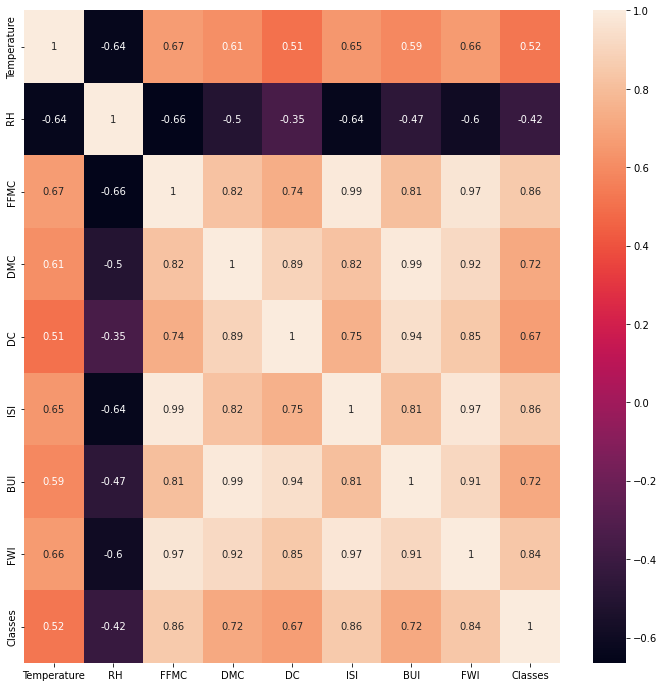

In [39]:
# Correlation 
plt.figure(figsize=(12,12))
sns.heatmap(df_new2.corr(method='spearman'), annot=True)

- Observations:
    1. Multi correlation between dataset and all Showing Good Relations with Temprature.
    2. Standard Scaling and Trainning Linear Model or Decision Tree

In [49]:
# Spllitting Dependent and Indipendent dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new2.drop("Temperature", axis=1), df_new2["Temperature"], test_size=0.1)
X_train.shape, X_test.shape

((218, 8), (25, 8))

In [50]:
# Importing Decision Tree Before Standard Scaling
from sklearn.tree import DecisionTreeRegressor

# Trainning Tree on base model
dt = DecisionTreeRegressor()

<AxesSubplot:>

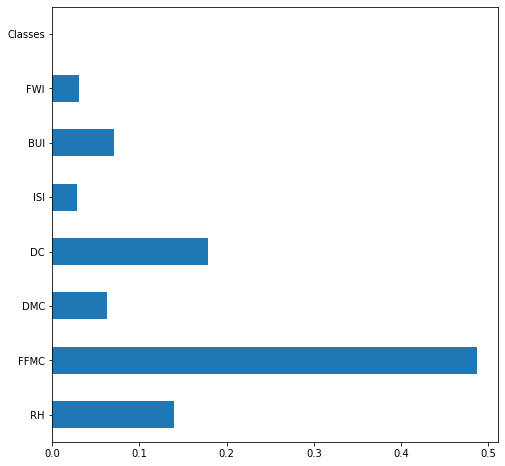

In [52]:
# Feature importance 
dt.fit(X_train,y_train)
dt_score = pd.Series(dt.feature_importances_)
dt_score.index = X_train.columns
dt_score.plot(kind="barh", figsize=(8,8))

- FFMC showing Strong Relation with Decision making.
- RH and DC also Showing Positive importance value.
- ISI, FWI and classes showing near to zero importance can be drop

In [53]:
# Trainning Linear Regression for calculating Weight.
# Before Standard Scaling
from sklearn.linear_model import LinearRegression

# Creating Linear Regression Object
lr = LinearRegression()

<AxesSubplot:>

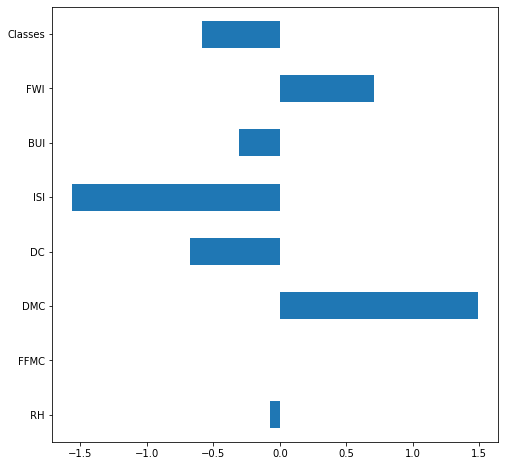

In [55]:
# For coefficent Before Standard Scaling
lr.fit(X_train, y_train)
lr_score = pd.Series(lr.coef_)
lr_score.index = X_train.columns
lr_score.plot(kind="barh", figsize=(8,8))

In [56]:
# After Standerd Scaling dataset
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

In [57]:
# Aapplying Standard Scaling
X_train_st = st.fit_transform(X_train)
X_test_st = st.transform(X_test)

<AxesSubplot:>

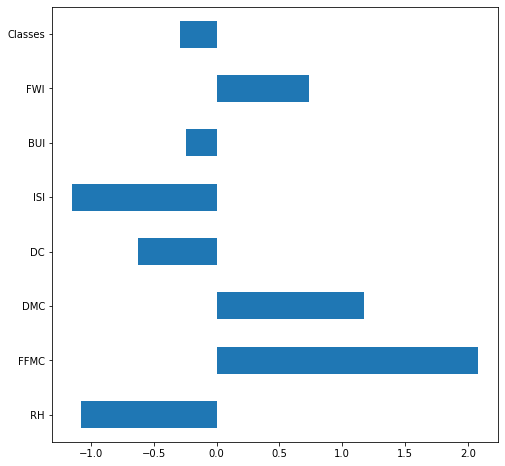

In [58]:
# For coefficent After Standard Scaling
lr.fit(X_train_st, y_train)
lr_score = pd.Series(lr.coef_)
lr_score.index = X_train.columns
lr_score.plot(kind="barh", figsize=(8,8))

- Classes and BUI Showing Least Relation with Temprature.
- RH, ISI FFMC and DMC Showing large Magnitude
- Droping BUI as It is Not Performing well and have high correlation with others

In [ ]:
# Dropping BUI:

# For Tree Models
X_train.drop("BUI", axis=1, inplace=True)
X_test.drop("BUI", axis=1, inplace=True)


In [100]:
X_train_st = st.fit_transform(X_train)
X_test_st = st.transform(X_test)

# Model Selection

- All Libraries

In [68]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, classification_report

In [69]:
# Building Model Objects
lasso = Lasso()
ridge = Ridge()
svr = SVR()

rf = RandomForestRegressor()
adaboost = AdaBoostRegressor()
gradient = GradientBoostingRegressor()
xgboost = XGBRegressor()

In [66]:
# Selecting Best Models for with Standard Scaling Values
models = { "Lasso" : lasso, "Ridge" : ridge, "SVC": svr}


for Name, model in models.items():
    print("_-_"*35)
    model.fit(X_train_st, y_train)
    score = model.score(X_test_st, y_test)
    mae = mean_absolute_error(y_test, model.predict(X_test_st))
    print("Model Name : ", Name)
    print("R2 Score : ", round(score, 2))
    print("MAE Score : ", mae)

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Lasso
R2 Score :  0.48
MAE Score :  2.4845150859151106
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Ridge
R2 Score :  0.65
MAE Score :  2.057538351244002
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  SVC
R2 Score :  0.62
MAE Score :  2.1068861312787392


In [70]:
# Selecting Best Models
models = {"Random Forest" : rf, "AdaBoost" : adaboost, "XGBoost" : xgboost, "Gradient Boost": gradient}

for Name, model in models.items():
    print("_-_"*35)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print("Model Name : ", Name)
    print("R2 Score : ", round(score, 2))
    print("MAE Score : ", mae)

_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Random Forest
R2 Score :  0.68
MAE Score :  1.791
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  AdaBoost
R2 Score :  0.61
MAE Score :  2.070008443028968
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  XGBoost
R2 Score :  0.66
MAE Score :  1.6923490905761718
_-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-__-_
Model Name :  Gradient Boost
R2 Score :  0.63
MAE Score :  1.947667873150385


- Observations:
    1. Three Models Perform Best in Base Models
    2. XGBoost has second best R2 Score and least MAE values, Random Forest is Best Performer but slightly higher MAE value.
    3. In Linear Modles Family Ridge Work Best

## Grid Search CV 

In [103]:
#Appling Grid Search Cv for optimal Parameters:
def to_GridSearch_normal(estimator, parameters): # estimator, Parameter, value for selecting dataset
    # Creating Object of GridSearchCV
    gs = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs=-1,verbose=2, cv=5)
    gs.fit(X_train.values,y_train)
    print("Best Perameters are :- ", gs.best_params_)
    print("Accuracy Score : ", gs.best_score_)
    return gs.best_estimator_

In [104]:
# Decision Tree
param = {
        "criterion":["squared_error", "poisson", "absolute_error"],
        "max_depth" : [2,4,5,8,None]
        }
rf = to_GridSearch_normal(RandomForestRegressor(),param)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Perameters are :-  {'criterion': 'squared_error', 'max_depth': 8}
Accuracy Score :  0.485273671067187


In [88]:
#XGBoost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb = to_GridSearch_normal(XGBRegressor(),params)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Perameters are :-  {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3}
Accuracy Score :  0.5012247145943988


In [101]:
#Appling Grid Search Cv for optimal Parameters:
def to_GridSearch(estimator, parameters): # estimator, Parameter, value for selecting dataset
    # Creating Object of GridSearchCV
    gs = GridSearchCV(estimator=estimator, param_grid=parameters, n_jobs=-1,verbose=2, cv=5)
    gs.fit(X_train_st,y_train)
    print("Best Perameters are :- ", gs.best_params_)
    print("Accuracy Score : ", gs.best_score_)
    return gs.best_estimator_

In [96]:
params = {
            "alpha" : [0.1,0.01,1,10,0.5,100],
            "solver" : ['auto', 'svd', 'cholesky', 'lsqr']
            
        }
ridge_rig = to_GridSearch(Ridge(), params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Perameters are :-  {'alpha': 10, 'solver': 'lsqr'}
Accuracy Score :  0.47252040952382546


In [102]:
# For SVM
params = {'C': [0.1,1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'poly', 'sigmoid']}

svm = to_GridSearch(SVR(),params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Perameters are :-  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy Score :  0.505573876493574


In [111]:
#XGBoost with Standard Scaling
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
xgb_st = to_GridSearch(XGBRegressor(),params)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
Best Perameters are :-  {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3}
Accuracy Score :  0.5012247145943988


### Taking MAE and R2 Score of Test Data

In [98]:
# SVM
score = svm.score(X_test_st, y_test)
mae = mean_absolute_error(y_test, svm.predict(X_test_st))

print("For SVM :")
print("R2 Score :", score)
print("MAE Values :", mae)

For SVM :
R2 Score : 0.7179188026043093
MAE Values : 1.5944634608770554


In [109]:
# Random Forest
score = rf.score(X_test.values, y_test)
mae = mean_absolute_error(y_test, rf.predict(X_test.values))

print("For Random Forest :")
print("R2 Score :", score)
print("MAE Values :", mae)

For Random Forest :
R2 Score : 0.6860806224628787
MAE Values : 1.795316231399059


In [110]:
# XGBoost 
score = xgb.score(X_test.values, y_test)
mae = mean_absolute_error(y_test, xgb.predict(X_test.values))

print("For XGBoost :")
print("R2 Score :", score)
print("MAE Values :", mae)

For XGBoost :
R2 Score : 0.6394884917473154
MAE Values : 1.955968475341797


In [112]:
# XGBoost with St
score = xgb_st.score(X_test_st, y_test)
mae = mean_absolute_error(y_test, xgb_st.predict(X_test_st))

print("For XGBoost with Standard Scaling:")
print("R2 Score :", score)
print("MAE Values :", mae)

For XGBoost with Standard Scaling:
R2 Score : 0.6394884917473154
MAE Values : 1.955968475341797


## K-fold cross val score

In [123]:
# Getting Full Dataset for Better Pridection
X = df_new2.drop(["Temperature","BUI"], axis=1)
y = df_new2["Temperature"]

In [125]:
# Without Standard Scaling
print("With Out Standard Scaling")
Models = {"Random Forest":rf, "XGBoost" : xgb}
for name, model in Models.items():
    score = cross_val_score(model, X.values, y, n_jobs=2, cv=5 ).mean()
    print("Model name : " , name)
    print("Average Score : ", score)

With Out Standard Scaling
Model name :  Random Forest
Average Score :  0.011013313859838858
Model name :  XGBoost
Average Score :  0.08070963326451894


In [126]:
# Standard Scaling
X_st = st.transform(X)

In [128]:
# With Standard Scaling
score = cross_val_score(svm, X_st, y, n_jobs=2, cv=5 ).mean()
print("Model name : SVM")
print("Average Score : ", score)

Model name : SVM
Average Score :  -0.15624405897613278
